In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
#Tenemos que predecir final_price de notebooks

In [203]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
df = pd.read_csv(data)


In [204]:
# Normalizamos los nombres de columnas
df.columns = df.columns.str.lower().str.replace(' ', '_')

#Normalizamos los elementos del df tipo object
string = list(df.columns[df.dtypes == 'object'])
for col in string:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head(
)


,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


In [205]:
df.columns
for col in df.columns:
    print('COLUMNA: ', col)
    print('VAL UNICAS: ', df[col].unique()[:5])
    print('NRO UNICOS: ',df[col].nunique())
    print('NRO NULOS: ',df[col].isnull().sum())
    print()

COLUMNA:  laptop
VAL UNICAS:  ['asus_expertbook_b1_b1502cba-ej0436x_intel_core_i5-1235u/8gb/512gb_ssd/15.6"'
 'alurin_go_start_intel_celeron_n4020/8gb/256gb_ssd/15.6"'
 'asus_expertbook_b1_b1502cba-ej0424x_intel_core_i3-1215u/8gb/256gb_ssd/15.6"'
 'msi_katana_gf66_12uc-082xes_intel_core_i7-12700h/16gb/1tb_ssd/rtx3050/15.6"'
 'hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb_ssd/15.6"']
NRO UNICOS:  2160
NRO NULOS:  0

COLUMNA:  status
VAL UNICAS:  ['new' 'refurbished']
NRO UNICOS:  2
NRO NULOS:  0

COLUMNA:  brand
VAL UNICAS:  ['asus' 'alurin' 'msi' 'hp' 'lenovo']
NRO UNICOS:  27
NRO NULOS:  0

COLUMNA:  model
VAL UNICAS:  ['expertbook' 'go' 'katana' '15s' 'crosshair']
NRO UNICOS:  121
NRO NULOS:  0

COLUMNA:  cpu
VAL UNICAS:  ['intel_core_i5' 'intel_celeron' 'intel_core_i3' 'intel_core_i7'
 'amd_ryzen_5']
NRO UNICOS:  28
NRO NULOS:  0

COLUMNA:  ram
VAL UNICAS:  [ 8 16 32 12  4]
NRO UNICOS:  9
NRO NULOS:  0

COLUMNA:  storage
VAL UNICAS:  [ 512  256 1000   64  128]
NRO UNICOS:  12
NRO N

In [206]:
# Datos perdidos (nulos)
col_nulos= list(df.columns[df.isnull().sum() > 0])
col_nulos
for col in col_nulos:
    print (col,': ', df[col].isnull().sum())

storage_type :  42
gpu :  1371
screen :  4


In [207]:
median_ram  = df.ram.median()
median_ram

np.float64(16.0)

<Axes: xlabel='final_price', ylabel='Count'>

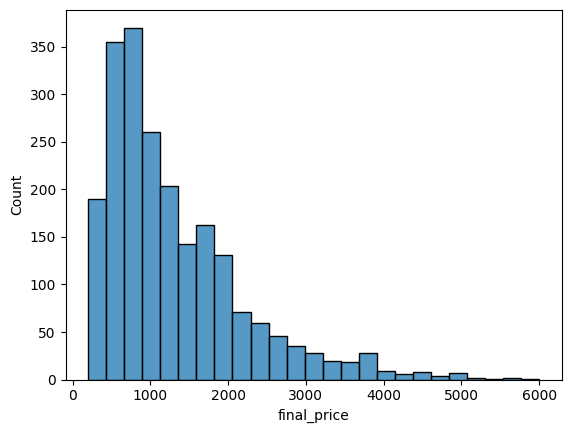

In [208]:
sns.histplot(df.final_price[df.final_price <= 6000], bins=25)   


<Axes: xlabel='final_price', ylabel='Count'>

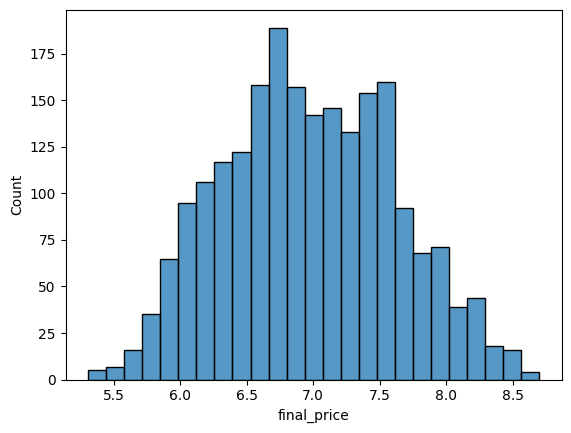

In [209]:
final_price_log = np.log1p(df.final_price)
sns.histplot(final_price_log[df.final_price <= 6000], bins=25)   

In [210]:
columns = [
    'ram', 
    'storage',
    'screen',
    'final_price'
]

df = df[columns]

In [211]:
# Particion DF 
n = len(df)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)

idx = np.arange(n) # crea un vector con numerso hasta n-1
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)



In [212]:
# Vector Y
y_train  = df_train.final_price.values
y_val = df_val.final_price.values
y_test  = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']


In [213]:
# Pesos w0 y w
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_INV = np.linalg.inv(XTX )
    w_full = XTX_INV.dot(X.T).dot(y)
    return w_full[0], w_full[1:] # Nos devuelve una tupla con el primer numero w0 y el resto en un array



In [214]:
# Armamos la matriz X
base = ['ram', 'storage', 'screen']

def prepare_X(df,fillna):
    df = df.copy()

    df_num = df[base]
    df_num = df_num.fillna(fillna)
    X = df_num.values
    return X



In [215]:
# Funcion RMSE
def rmse(y, y_pred):
    se = ( y_pred - y) ** 2 # elevamos al cuadrado las diferencias
    mse = se.mean() # promedio (suma divido la cantidad m)
    return np.sqrt(mse) # raiz cuadrada

In [216]:
#Valores nulos screen por mean
mean = df_train.screen.mean()

X_train = prepare_X (df_train,fillna= mean)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X (df_val,fillna=mean)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(600.2650313748483)

In [217]:
#Valores nulos screen por 0
X_train = prepare_X (df_train,fillna = 0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X (df_val, fillna = 0)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(597.363559361963)

In [218]:
# REGULARIZACION con fillna 0 screen
def train_linear_regression_reg(X,y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX = XTX + r *np.eye(XTX.shape[0])

    XTX_INV = np.linalg.inv(XTX )
    w_full = XTX_INV.dot(X.T).dot(y)
    return w_full[0], w_full[1:] 

In [219]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X (df_train,fillna=0)
    w0, w = train_linear_regression_reg(X_train, y_train,r)

    X_val = prepare_X (df_val, fillna=0)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    print('r:',r,' ','score:', round(score,4))

r: 0   score: 597.3636
r: 0.01   score: 597.3617
r: 0.1   score: 597.3452
r: 1   score: 597.2121
r: 5   score: 597.0111
r: 10   score: 597.0588
r: 100   score: 597.9033


In [220]:
#Q5 For para ver los resultados de las distitnas seed y calcular desviacion standart
seed_scores= []
for s in [0,1,2,3,4,5,6,7,8,9]:
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - (n_val+n_test)

    idx = np.arange(n) # crea un vector con numerso hasta n-1

    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    y_train  = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test  = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']



    X_train = prepare_X (df_train,fillna=0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X (df_val,fillna=0)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    seed_scores.append(score)
    print(s, score)

np.std(seed_scores)


0 565.4520868770992
1 636.7985423056716
2 588.9558697907979
3 597.8148920012542
4 571.9627915111046
5 573.2383256618959
6 647.3438328407311
7 550.4398184485875
8 587.333503616987
9 576.1017929433077


np.float64(29.176491258295968)

In [221]:
# Q6 Concatenamos DF TRAIN Y VAL y lo probamos contra Test. Seed 9
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val+n_test)

idx = np.arange(n) # crea un vector con numerso hasta n-1

np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True) 
df_test = df_test.reset_index(drop = True)
y_train  = df_train.final_price.values
y_val = df_val.final_price.values
y_test  = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']



df_full_train = pd.concat([df_train,df_val])
df_full_train = df_full_train.reset_index(drop = True)

y_full_train = np.concatenate([y_train, y_val])

X_full_train = prepare_X(df_full_train,fillna=0)
w0, w = train_linear_regression(X_full_train, y_full_train)
X_test = prepare_X(df_test,fillna=0)
y_pred = w0 + X_test.dot(w)

rmse(y_test,y_pred)


np.float64(608.6102791248103)